In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def visualize_attention_for_timestamp(target_t, temporal_att_file, channel_att_file, channel_names=None):
# def visualize_attention_for_timestamp(target_t, channel_att_file, channel_names=None):
    """
    특정 타임스탬프(target_t)가 속한 윈도우의 Attention map을 시각화합니다.

    Args:
        target_t (int): 확인하고 싶은 시점의 인덱스.
        temporal_att_file (str): Temporal attention 딕셔너리 파일 경로.
        channel_att_file (str): Channel attention 딕셔너리 파일 경로.
        channel_names (list, optional): 채널(변수)의 이름 리스트.
    """
    # 1. 저장된 Attention map 딕셔너리 불러오기
    if not os.path.exists(temporal_att_file) or not os.path.exists(channel_att_file):
        print(f"오류: Attention 파일(.npy)을 찾을 수 없습니다. 경로를 확인해주세요.")
        print(f"Temporal 파일 경로: {temporal_att_file}")
        print(f"Channel 파일 경로: {channel_att_file}")
        return
        
    temporal_attns = np.load(temporal_att_file, allow_pickle=True).item()
    channel_attns = np.load(channel_att_file, allow_pickle=True).item()

    found_key = None
    # 2. target_t가 속해 있는 윈도우(key) 찾기
    for start, end in channel_attns.keys():
        if start <= target_t <= end:
            found_key = (start, end)
            break
            
    if found_key is None:
        print(f"입력한 시점 {target_t}에 해당하는 Attention map을 찾을 수 없습니다.")
        print("윈도우 범위를 벗어났거나 Attention이 저장되지 않았을 수 있습니다.")
        return

    print(f"입력한 시점 t={target_t}는 윈도우 {found_key}에 속합니다.")
    print(f"해당 윈도우의 Attention Map을 시각화합니다.")
    
    # 3. 해당 윈도우의 Attention map 가져오기
    temp_map = temporal_attns[found_key]
    chan_map = channel_attns[found_key]

    # 4. 시각화
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Temporal Attention 시각화
    sns.heatmap(temp_map, cmap='viridis', ax=axes[0], cbar_kws={'shrink': 0.8})
    axes[0].set_title(f'Temporal Attention (Window: {found_key})', fontsize=16)
    axes[0].set_xlabel('Key Timesteps (Relative to Window Start)')
    axes[0].set_ylabel('Query Timesteps (Relative to Window Start)')
    
    # Channel Attention 시각화
    if channel_names is None:
        channel_names = [f'Ch_{i+1}' for i in range(chan_map.shape[0])]

    sns.heatmap(chan_map, cmap='plasma', ax=axes[1], 
                xticklabels=channel_names, yticklabels=channel_names, cbar_kws={'shrink': 0.8})
    axes[1].set_title(f'Channel Attention (Window: {found_key})', fontsize=16)
    axes[1].set_xlabel('Key Channels')
    axes[1].set_ylabel('Query Channels')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='y', rotation=0)
    
    plt.tight_layout()
    plt.show()

입력한 시점 t=4500는 윈도우 (4500, 4549)에 속합니다.
해당 윈도우의 Attention Map을 시각화합니다.


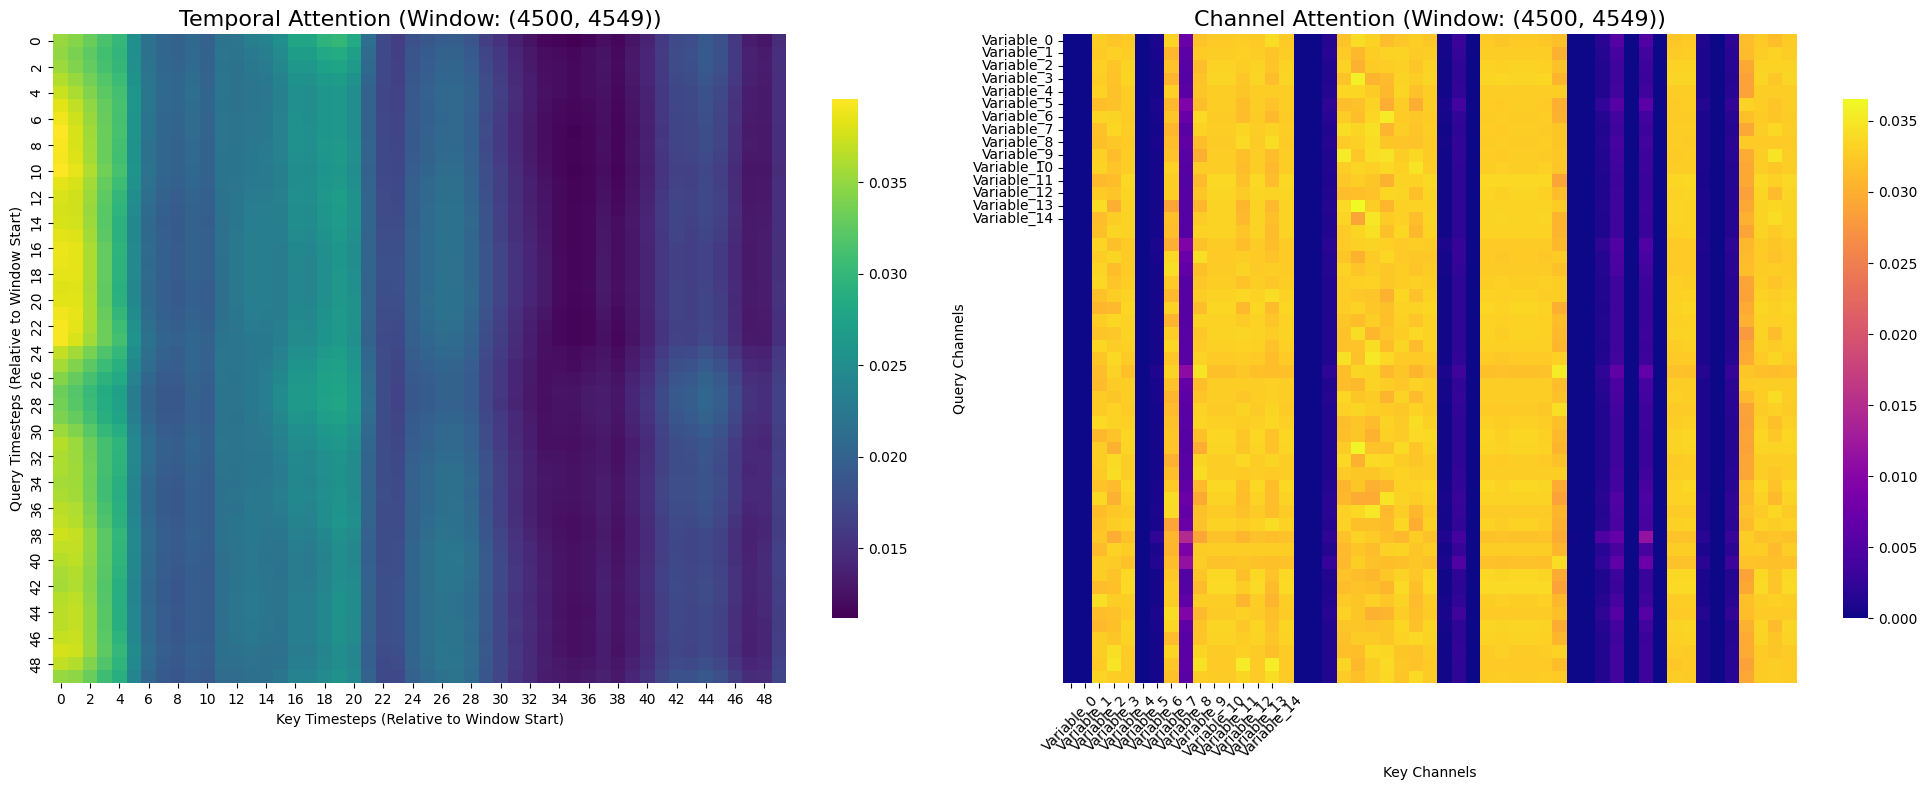

In [10]:
# 1. 확인하고 싶은 시점을 입력하세요.
target_timestamp = 4500
output_folder = r'output\SWaT\Proposed\06112025_165923'
temporal_attention_filepath = os.path.join(output_folder, 'temporal_att_storage.npy')
channel_attention_filepath = os.path.join(output_folder, 'channel_att_storage.npy')

# 3. (선택사항) 데이터의 채널(변수) 이름을 리스트로 제공하면 그래프에 표시됩니다.
#    예시: my_channel_names = ['Sensor_A', 'Sensor_B', 'Voltage', ...]
#    채널 수에 맞게 리스트를 생성해주세요.
num_channels = 15  # 예시: 총 15개의 채널
my_channel_names = [f'Variable_{i}' for i in range(num_channels)]

visualize_attention_for_timestamp(
    target_t=target_timestamp,
    temporal_att_file=temporal_attention_filepath,
    channel_att_file=channel_attention_filepath,
    channel_names=my_channel_names
)
